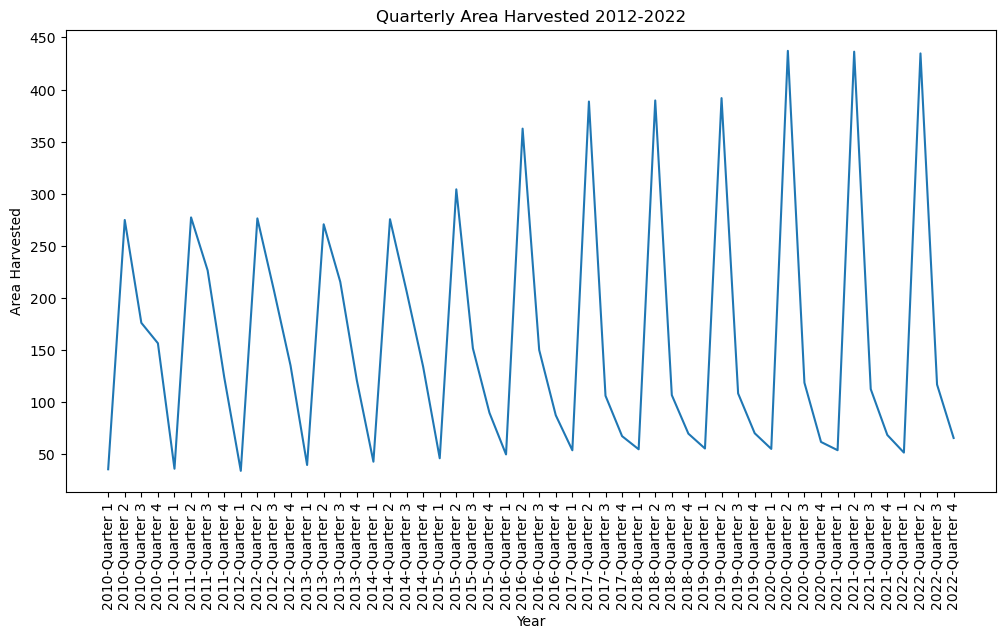

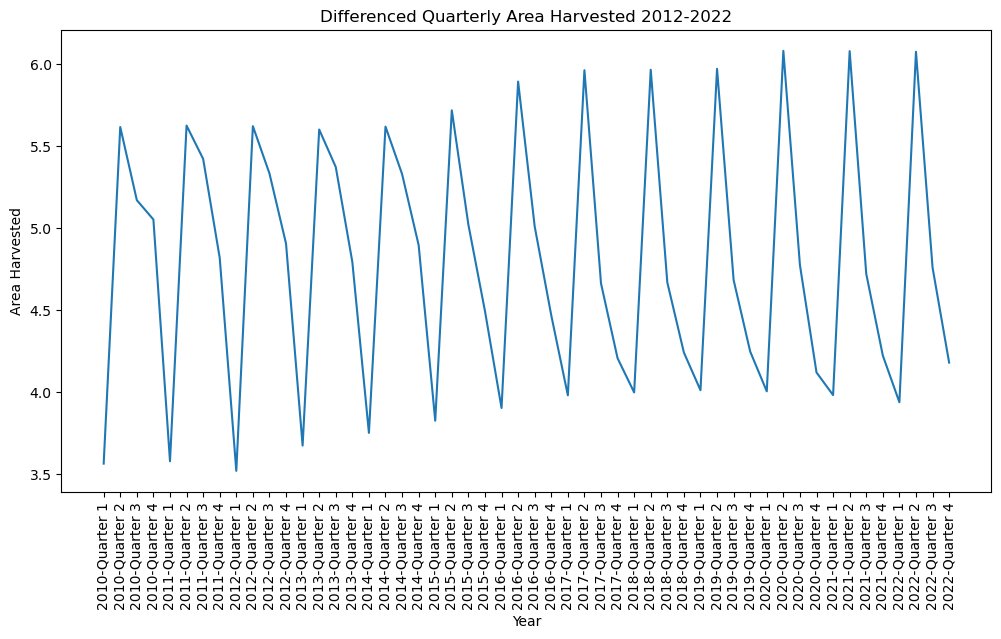

First ADF Test:
ADF Statistic: 1.0177287062999012
p-value: 0.9944495292224331
Critical Values:
1%:-3.7112123008648155
5%:-2.981246804733728
10%:-2.6300945562130176

Second ADF Test(after differencing):
ADF Statistic: -3.818942601460469
p-value: 0.002719346034079724
Critical Values:
1%:-3.6699197407407405
5%:-2.9640707407407407
10%:-2.621171111111111


C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      AreaHarvested_log   No. Observations:                   36
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  14.874
Date:                Fri, 16 Jun 2023   AIC                            -19.748
Time:                        14:33:30   BIC                            -11.971
Sample:                             0   HQIC                           -17.063
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8346      0.147     -5.661      0.000      -1.124      -0.546
ar.L2         -0.8230      0.155     -5.302      0.000      -1.127      -0.519
ar.L3         -0.7697      0.152     -5.049      0.0

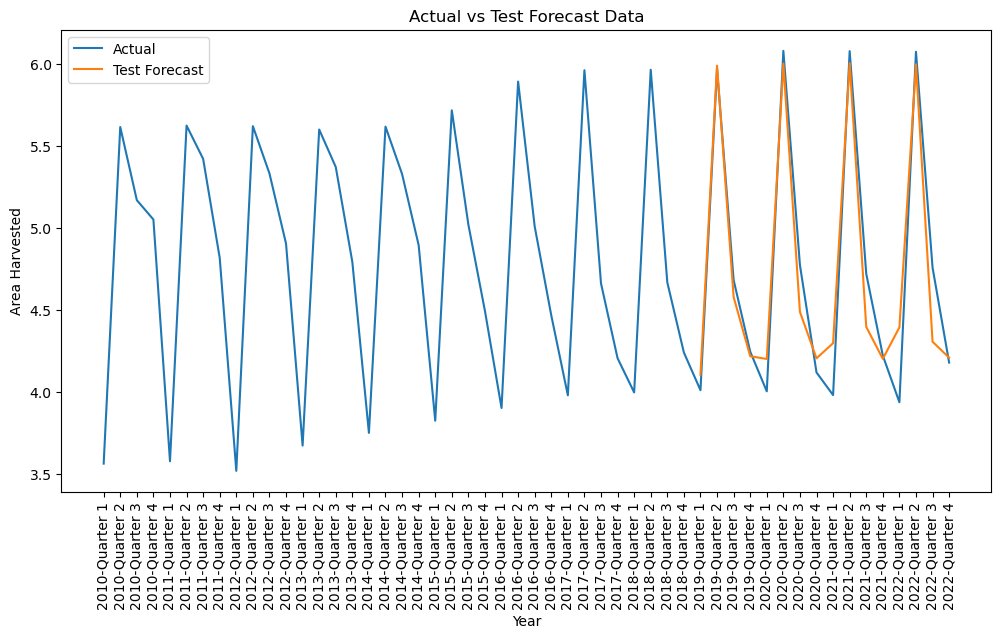


Mean Absolute Error (MAE): 0.16504638292674734
Mean Absolute Percentage Error (MAPE): 0.03711424958110484
Root Mean Squared Error (RMSE): 0.22150098344173372

Enter the number of years ahead to predict: 3


C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'



Predicted Future Data
    Year  TimePeriod  Prediction
36  2023           1   70.586224
37  2023           2  387.916411
38  2023           3   92.705614
39  2023           4   69.503073
40  2024           1   86.505976
41  2024           2  384.969534
42  2024           3   79.216070
43  2024           4   70.872934
44  2025           1  102.012035
45  2025           2  380.732633
46  2025           3   66.162579
47  2025           4   73.538232


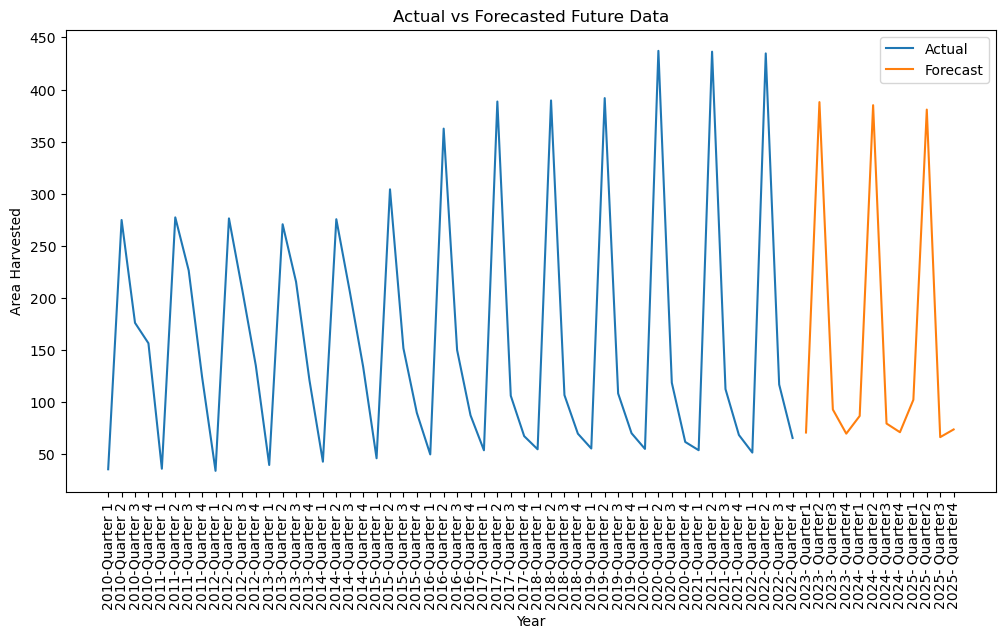

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load the data
data = pd.read_csv('csv/AreaHarvested.csv')

# Convert 'Year' column to string type
data['Year'] = data['Year'].astype(str)
# Create a new column combining 'Year' and 'TimePeriod'
data['YearQuarter'] = data['Year'] + '-' + data['TimePeriod']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['AreaHarvested'])
plt.xlabel('Year')
plt.ylabel('Area Harvested')
plt.title('Quarterly Area Harvested 2012-2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Take the logarithm of the 'AreaHarvested' column
data['AreaHarvested_log'] = np.log(data['AreaHarvested'])

# Plot the logarithm of the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['AreaHarvested_log'])
plt.xlabel('Year')
plt.ylabel('Area Harvested')
plt.title('Differenced Quarterly Area Harvested 2012-2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

train_data = data['AreaHarvested_log'].iloc[:int(len(data) * 0.7)]

# Step 2: Check for stationarity and determine ARIMA model parameters

# Perform the ADF test
print('First ADF Test:')
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}:{value}')
    
# Difference time series data for stationarity
train_data_diff = train_data.diff().dropna()

# Perform the ADF test
print('\nSecond ADF Test(after differencing):')
result = adfuller(train_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}:{value}')

# Step 3: Fit the ARIMA model
model = ARIMA(train_data, order=(4, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

# Step 4: Make time series predictions
test_data = data['AreaHarvested_log'].iloc[int(len(data) * 0.7):]
forecast = model_fit.forecast(steps=len(test_data))

# Step 6: Combine actual and forecasted data for plotting
combined_data = pd.concat([data[['YearQuarter', 'AreaHarvested_log']], pd.Series(forecast)], axis=1)
combined_data.columns = ['Year', 'Actual', 'Forecast']

# Plot the actual and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Actual'], label='Actual')
plt.plot(combined_data['Year'], combined_data['Forecast'], label='Test Forecast')
plt.xlabel('Year')
plt.ylabel('Area Harvested')
plt.title('Actual vs Test Forecast Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

# Step 5: Evaluate model predictions
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast)
mape = mean_absolute_percentage_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('\nMean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)

# Make actual predictions
# User input for prediction
num_years = int(input('\nEnter the number of years ahead to predict: '))

# Fit the ARIMA model using the actual series
train_data = data['AreaHarvested'].iloc[:int(len(data) * 0.7)]
model = ARIMA(train_data, order=(4, 1, 0))
model_fit = model.fit()

# Step 7: Make actual predictions on future data
last_year = int(data['Year'].iloc[-1])
last_year = last_year + 1
future_years = pd.date_range(start=f'{last_year}-01-01', periods=num_years * 4, freq='Q')
future_forecast = pd.Series(model_fit.forecast(steps=num_years * 4))

# Create the prediction DataFrame
prediction_df = pd.DataFrame({'Year': future_years.year, 'TimePeriod': future_years.quarter, 'Prediction': future_forecast})

# Print the prediction
print('\nPredicted Future Data')
print(prediction_df)

# Step 8: Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['AreaHarvested'], label='Actual')
plt.plot(prediction_df['Year'].astype(str) + '- Quarter' + prediction_df['TimePeriod'].astype(str), prediction_df['Prediction'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('Area Harvested')
plt.title('Actual vs Forecasted Future Data')
plt.xticks(rotation=90)
plt.legend()
plt.show()
